In [36]:
# import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import inspect
import csv
import src.tuning as t

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tuning: communication network

In [37]:
# Instantiate tuning class
tuning =  t.GridSearch()

/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:18: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:126: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  super(GridSearch, self).__init__()
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:19: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


## 1. Grid search: crude (400 parameter combinations)
note: communication network misses two nodes, because they had no communication with others in their class <br>
missing: number 1653 & 5017

In [38]:
# specify parameter space for grid search
seq = np.arange(0,1.05,0.05)

### 1.1 Run grid search simulations

In [39]:
# Run simulation
result_error, result_child, result_cl, empirical_data = tuning.execute(t_range=seq,
                                                                       i_range=seq,
                                                                       t=700,
                                                                       population_name='communication')

thres_PA: 0.0 I_PA: 0.0 error: 0.6122728301067148 runtime: 7.968285083770752
thres_PA: 0.0 I_PA: 0.05 error: 16.20154484874395 runtime: 7.627299785614014
thres_PA: 0.0 I_PA: 0.1 error: 39.02114722149803 runtime: 7.851372957229614
thres_PA: 0.0 I_PA: 0.15000000000000002 error: 41.422156958985525 runtime: 7.452500104904175
thres_PA: 0.0 I_PA: 0.2 error: 41.45294653656794 runtime: 7.630831956863403
thres_PA: 0.0 I_PA: 0.25 error: 41.527752735904095 runtime: 7.636142015457153
thres_PA: 0.0 I_PA: 0.30000000000000004 error: 41.51516184572217 runtime: 7.559808969497681
thres_PA: 0.0 I_PA: 0.35000000000000003 error: 41.530937237789885 runtime: 7.6142542362213135
thres_PA: 0.0 I_PA: 0.4 error: 40.973803811743274 runtime: 7.545879125595093
thres_PA: 0.0 I_PA: 0.45 error: 41.57326917699 runtime: 7.677592992782593
thres_PA: 0.0 I_PA: 0.5 error: 41.597321200699696 runtime: 7.63004207611084
thres_PA: 0.0 I_PA: 0.55 error: 41.6477934877672 runtime: 7.515952110290527
thres_PA: 0.0 I_PA: 0.600000000000

### 1.2 Results

In [40]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)
errors_df

1,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0,,,,,,,,,,,,,,,,,,,,,
0.00,0.612273,16.201545,39.021147,41.422157,41.452947,41.527753,4.151516e+01,41.530937,40.973804,41.573269,...,4.164779e+01,41.622676,41.676421,41.690707,4.171660e+01,4.174028e+01,41.738406,41.737309,41.755148,41.818227
0.05,0.612273,382.936073,83.232512,26.990568,8.423739,3.286936,2.428215e+00,3.404075,5.021040,6.951387,...,5.783516e+05,369.780851,15.700831,19.120647,2.090940e+01,2.406322e+01,24.466791,29.805217,34.073149,41.818227
0.10,0.612273,227.481011,568.195084,240.753698,116.659863,70.202278,3.404765e+01,23.279010,9.431785,6.502317,...,2.181466e+00,3.324061,4.397318,5.656996,3.542274e+43,1.150348e+01,13.884398,18.169296,25.563781,41.818227
0.15,0.612273,1.726320,445.606058,674.500377,383.072112,276.457707,4.816065e+06,93.222209,59.521130,44.113322,...,9.725139e+14,9.316227,5.894246,3.107621,3.668499e+00,5.398404e+00,4.987778,10.897460,22.331799,41.579275
0.20,0.612273,1.620755,522.505894,424.543498,660.124077,431.776318,2.736275e+02,223.969330,192.908092,100.225218,...,1.086412e+07,34.059032,17.829565,10.455749,1.044402e+01,3.521523e+20,4.460223,9.012335,18.855651,38.461440
0.25,0.612273,1.524805,812.554628,111.183142,697.492868,577.930151,5.173219e+02,312.775547,249.338243,203.923844,...,1.044215e+02,84.631481,38.595587,27.766758,1.526252e+01,2.854238e+16,5.918781,5.957123,12.244141,35.288868
0.30,0.612273,1.433835,639.607318,2.244643,449.311132,668.628566,4.521650e+02,529.770197,350.881654,294.925430,...,1.434729e+02,107032.876111,83.672305,63.043321,3.497725e+01,1.806297e+01,8.271244,9.457367,12.384327,29.291487
0.35,0.612273,1.303776,868.293130,2.028961,361.143082,702.232040,5.221070e+02,576.836764,470.890326,463.532443,...,2.602937e+02,206.297069,120.218035,74.114084,6.034461e+01,3.696324e+01,35.397625,11.671865,6.704853,29.251141
0.40,0.612273,1.246571,1.403548,1.626045,426.004964,274.198147,4.923810e+02,675.656812,470.675182,570.606301,...,1.410719e+10,1660.684302,119.561269,128.846922,9.524560e+01,5.776497e+01,41.829403,20.477943,26.509689,22.606148


Text(0.5, 105.0, 'I PA')

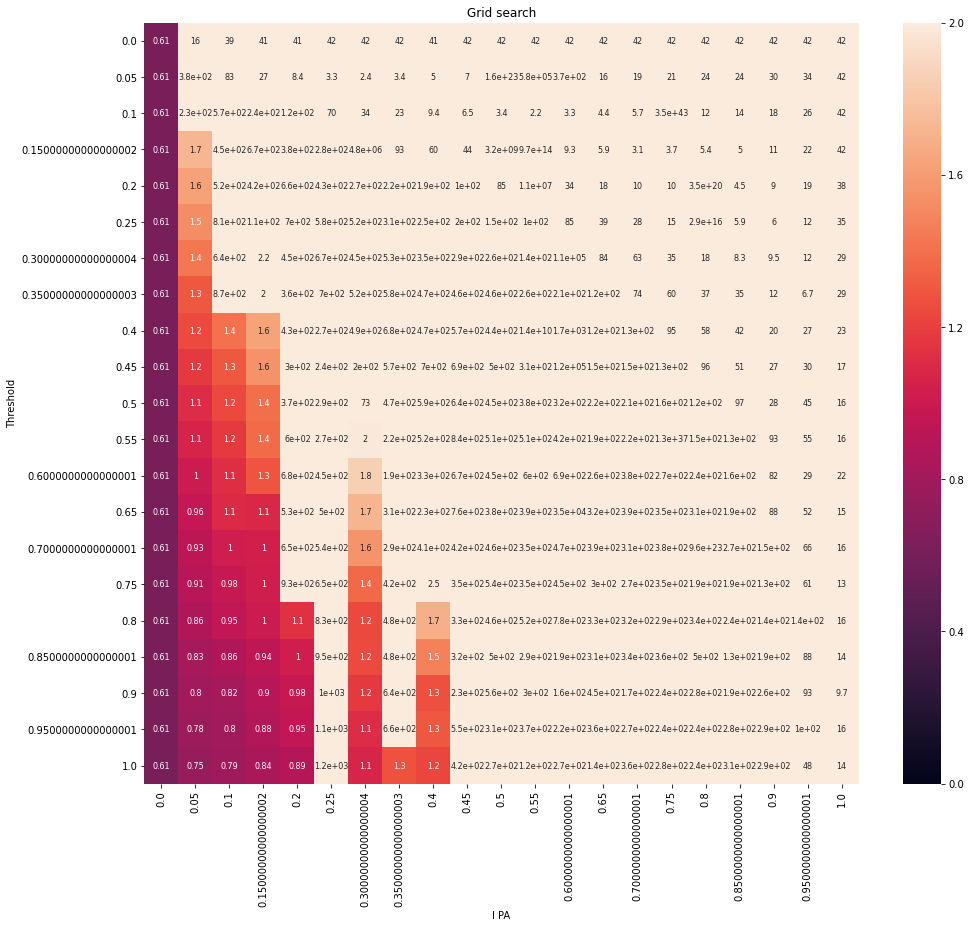

In [41]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=0, vmax=2)
plt.ylabel('Threshold')
plt.xlabel('I PA')


In [42]:
plt.savefig('../output/grid_search1_communication.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

## 2. Grid search: subspace (2000 parameter combinations)

In [43]:
# specify parameter space for grid search
t_seq = np.arange(0.025,1.025,0.025)
i_seq = np.arange(0.001,0.051,0.001)

### 2.1 Run grid search simulations

In [44]:
result_error2, result_child2, result_cl2, empirical_data2 = tuning.execute(t_range=t_seq,
                                                                           i_range=i_seq,
                                                                           t=700,
                                                                           population_name='communication')

thres_PA: 0.025 I_PA: 0.001 error: 0.8688174971926732 runtime: 6.157159805297852
thres_PA: 0.025 I_PA: 0.002 error: 1.2361837832908074 runtime: 6.1535022258758545
thres_PA: 0.025 I_PA: 0.003 error: 1.2497347104929417 runtime: 6.114198684692383
thres_PA: 0.025 I_PA: 0.004 error: 1.2750677247378879 runtime: 6.027162790298462
thres_PA: 0.025 I_PA: 0.005 error: 1.3148773277538957 runtime: 5.96804141998291
thres_PA: 0.025 I_PA: 0.006 error: 1.3246884458792583 runtime: 6.080337047576904
thres_PA: 0.025 I_PA: 0.007 error: 1.4406545988455135 runtime: 6.086302757263184
thres_PA: 0.025 I_PA: 0.008 error: 1.5049059829541223 runtime: 6.009958028793335
thres_PA: 0.025 I_PA: 0.009000000000000001 error: 1.6122862184449485 runtime: 5.976677179336548
thres_PA: 0.025 I_PA: 0.010000000000000002 error: 1.5502767604412147 runtime: 6.125936031341553
thres_PA: 0.025 I_PA: 0.011 error: 1.7124546678278585 runtime: 6.0154218673706055
thres_PA: 0.025 I_PA: 0.012 error: 1.7068750672620103 runtime: 5.9974467754364

### 2.2 Results

In [45]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010,...,0.041,0.042,0.043,0.044,0.045,0.046,0.047,0.048,0.049,0.050
0,,,,,,,,,,,,,,,,,,,,,
0.025,0.868817,1.236184,1.249735,1.275068,1.314877,1.324688,1.440655,1.504906,1.612286,1.550277,...,118.600798,116.985373,127.330345,129.343195,89.456988,87.731852,78.016284,72.780716,80.928907,84.194221
0.050,0.807269,1.192876,1.195130,1.204028,1.227981,1.223187,1.235486,1.242162,1.283265,1.305824,...,458.163954,340.465673,426.461105,441.787167,426.157133,474.951003,414.926089,422.741654,463.121463,382.936073
0.075,0.817531,1.226725,1.226434,1.230155,1.245050,1.246327,1.255104,1.270447,1.284144,1.310272,...,71.847177,187.009146,195.998957,203.731432,471.485488,112.418030,529.469783,277.646298,60.783500,615.651088
0.100,0.860458,1.283281,1.285067,1.295472,1.307508,1.304722,1.322402,1.330716,1.343650,1.343080,...,1.777133,1.933160,1.935031,1.830204,1.963324,2.089706,1.933452,157.709217,115.969080,227.481011
0.125,0.890647,1.304352,1.305633,1.312367,1.325212,1.325348,1.335841,1.343498,1.355318,1.363688,...,1.732808,1.676121,1.823681,1.764806,1.721622,1.860451,1.942381,293.276478,2.304207,438.443419
0.150,0.912553,1.306451,1.304953,1.310446,1.315393,1.309834,1.321413,1.331880,1.340285,1.338004,...,1.616292,1.617771,1.624484,1.563021,1.644260,1.635563,1.586375,1.689032,1.717675,1.726320
0.175,0.941170,1.330871,1.334190,1.335240,1.336229,1.348251,1.345495,1.354209,1.356212,1.362236,...,1.501302,1.537585,1.535549,1.590067,1.601516,1.564378,1.579815,1.613443,1.598856,1.598330
0.200,0.955989,1.337483,1.338952,1.343710,1.345725,1.349499,1.350194,1.358028,1.373161,1.374535,...,1.540548,1.558025,1.564572,1.548221,1.575613,1.618365,1.625025,1.626805,1.619687,1.620755
0.225,0.965950,1.332929,1.332191,1.337358,1.342276,1.341604,1.350965,1.347341,1.361914,1.359180,...,1.513038,1.526842,1.505547,1.499078,1.530429,1.530079,1.506100,1.530525,1.522220,1.534656


Text(0.5, 105.0, 'I PA')

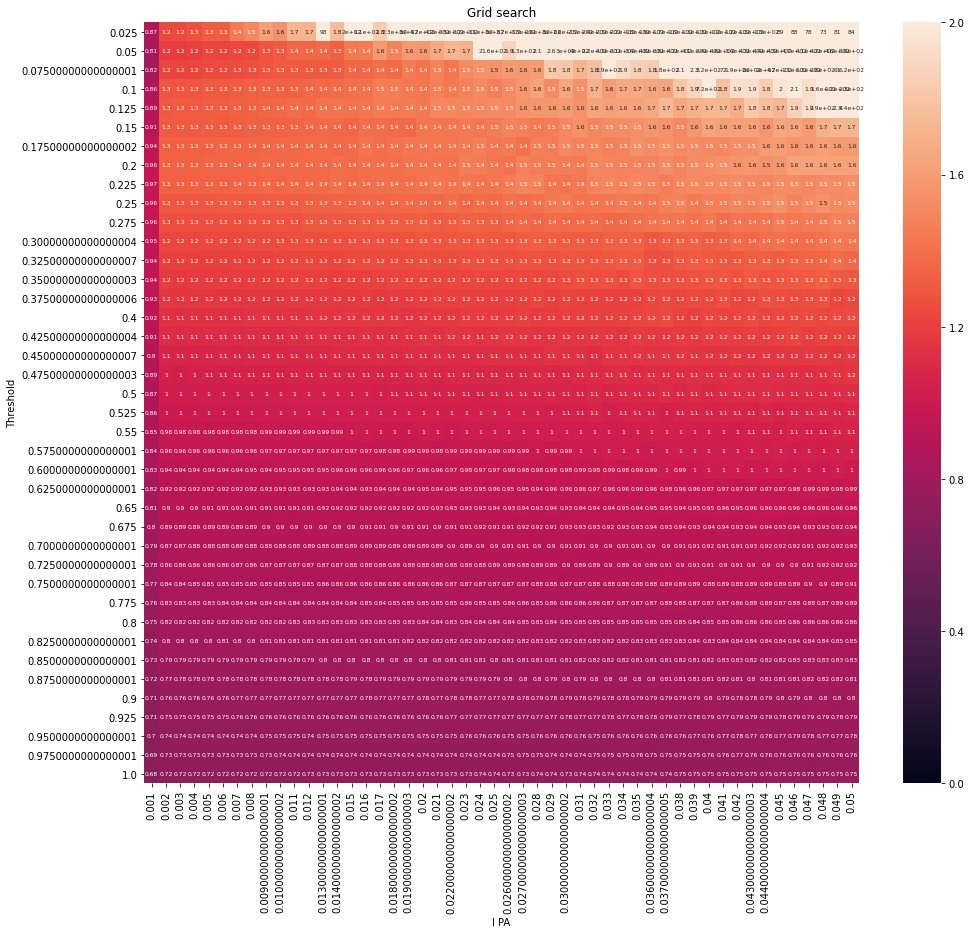

In [46]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 6}, vmin=0, vmax=2)
plt.ylabel('Threshold')
plt.xlabel('I PA')


In [47]:
plt.savefig('../output/grid_search2_communication.eps', bbox_inches='tight', format='eps', dpi=1000)

<Figure size 432x288 with 0 Axes>

0      1.390215
1      1.392320
2      1.394411
3      1.396406
4      1.398512
         ...   
695    1.478501
696    1.478501
697    1.478501
698    1.478501
699    1.478501
Length: 700, dtype: float64

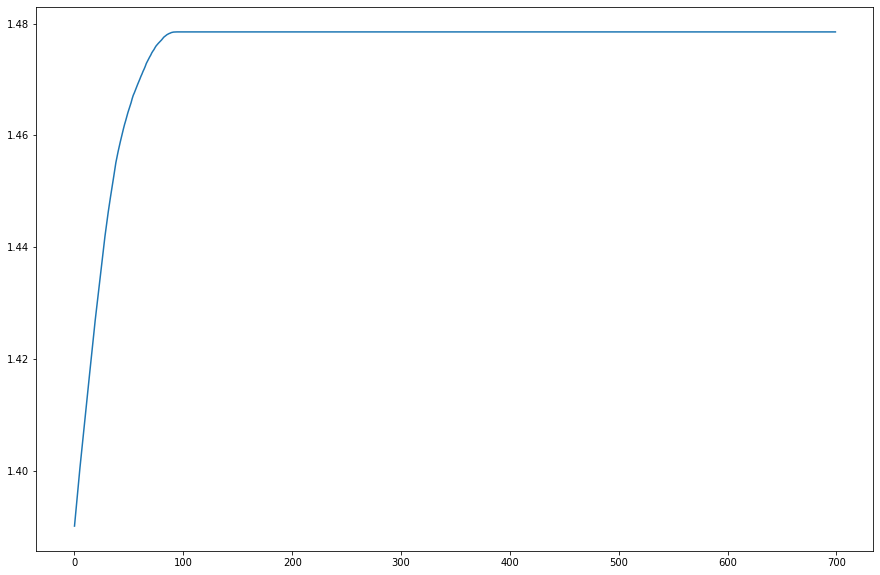

In [48]:
# Plot single parameter combination (for visualization)
a = pd.DataFrame(result_cl2[1961]).mean(axis=1)
a.plot(figsize=((15,10)))
a


### 2.3 Select best fitting parameter combinations

In [49]:
sort_errors = result_error2
opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]
opt_pars

[(1.0, 0.001, 0.6811274471886677),
 (0.9750000000000001, 0.001, 0.6887501877530745),
 (0.9500000000000001, 0.001, 0.6969580766655914),
 (0.925, 0.001, 0.70570369993585),
 (0.9, 0.001, 0.7143515099147015),
 (1.0, 0.002, 0.7212946059323349),
 (1.0, 0.003, 0.7219282663495725),
 (1.0, 0.004, 0.7223666450072156),
 (0.8750000000000001, 0.001, 0.7233032876111398),
 (1.0, 0.006, 0.7234676619412274),
 (1.0, 0.005, 0.7239203796013032),
 (1.0, 0.011, 0.7243016682699126),
 (1.0, 0.010000000000000002, 0.7243284507423775),
 (1.0, 0.008, 0.7243801779226463),
 (1.0, 0.009000000000000001, 0.7244381346590492),
 (1.0, 0.007, 0.7249657012841337),
 (1.0, 0.013000000000000001, 0.7261918433449951),
 (1.0, 0.015, 0.7268027202216952),
 (1.0, 0.012, 0.7269806984661819),
 (1.0, 0.017, 0.7276775042528543),
 (1.0, 0.014000000000000002, 0.7289523585281534),
 (1.0, 0.019000000000000003, 0.729969376886434),
 (1.0, 0.018000000000000002, 0.7303793273144815),
 (1.0, 0.016, 0.730422278798547),
 (0.9750000000000001, 0.004

In [50]:
# Save parameter combinations in csv

with open('../output/opt_pars_communication.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)